# Understanding nighttime methane signals at the Amazon Tall Tower Observatory (ATTO)

### Santiago Botía B, et al., (2019)
### Plots for Sections 3.3 and Appendix


In [1]:
#import sys
#sys.path.append('/pf/b/b301034/anaconda3/lib/python3.7/site-packages/')
# above lines needed when running from a different environment, not base
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
import scipy
from IPython.core.display import Image, display
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Section 3.3. Potential sources and transport mechanisms
### Section 3.3.1 Constraining sources
### Figure 11. Distance to sources
- the file ATTO_30min_INSTall_Flux_CH4_Gerbig_dist2.csv is the one generated from the Rscript based on ATTO_30min_INSTall_Flux_CH4.csv. This last one I generated doing something similar to what I did in the 03_DataMerging.ipynb, but since I added the soilmois dataframe I can not reproduce exactly the same df. 
- To be able to reproduce the plot in the paper I need to use ATTO_30min_INSTall_Flux_CH4_Gerbig_dist2.csv, but the problem is that I can not reproduce and generate exactly the same df as ATTO_30min_INSTall_Flux_CH4.csv, which is the one that is used for *_dist2.csv.
- For practical reasons I decided to keep ATTO_30min_INSTall_Flux_CH4.csv and use it in the Rscript, in case I need to generate it anew, then I would have to debug the merging done in 03_DataMerging.ipynb. 
    - A hint if I need to debug is that I am using the INST_aws_precertified_30min_corrected. I might have not use this corrected version before. So in case I need to debug then I could do the merging with both and see which one give something as the ATTO_30min_INSTall_Flux_CH4.csv.

In [2]:
# Importing data that was generated in R previously by Christoph Gerbig
# The R script is: Sbotia_et_al_distance_to_sources.R
df = pd.read_csv('./Data/ATTO_30min_INSTall_Flux_CH4_Gerbig_dist2.csv')
df['LTime'] = pd.to_datetime(df['LTime'])
df.set_index('LTime',inplace=True)

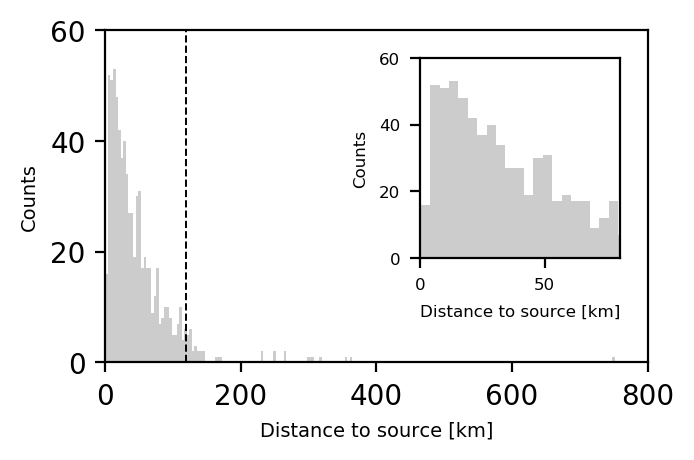

In [3]:
# Figure in paper
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
df_n      = df.between_time('20:00','06:00')
fig, (ax) = plt.subplots(1, 1, figsize=(3.5,2.2),dpi=200)
#fig,ax     = plt.figure(figsize=(3.5,2.5),dpi=300)

sns.distplot(df_n['dist_source81'].dropna(),bins=200,kde=False,color='grey',ax=ax)
#plt.vlines(120,0,1)
ax.set_ylabel('Counts',fontsize=7)
ax.set_xlabel('Distance to source [km]',fontsize=7)
ax.set_xlim(0,800)
ax.set_ylim(0,60)
ax.vlines(120,0,60,color='k',lw=0.7,linestyle='--')

axins = inset_axes(ax, width=1, height=1,loc=1,borderpad=1)
sns.distplot(df_n['dist_source81'].dropna(),bins=200,kde=False,ax=axins,color='grey')
axins.set_xlim(0,80)
axins.set_ylim(0,60)
axins.set_ylabel('Counts',fontsize=6)
axins.set_xlabel('Distance to source [km]',fontsize=6)
axins.set_xticklabels([0,50],fontsize=6)
axins.set_yticklabels([0,20,40,60],fontsize=6)

#plt.subplots_adjust(wspace=0.25,hspace=0.15)
#plt.tight_layout()
plt.show()
#fig.savefig('./Figures/ATTO_distance_Source_distplot.png')

## Section 3.3. Potential sources and transport mechanisms
### Section 3.3.3 Rejecting biomass burning influence
### Figures 12 and 13. CH$_4$:CO and BC:CO ratios

In [9]:
# Function that gets the points of a straight line based on a given slope
def get_points_ER(x,y,er):
    y_1    = y.min()
    x_1    = x.min() #- x.std()

    #y_1    = 0
    #x_1    = 0
    
    x_2 = x.max()
    y_2 = er * (x_2 - x_1) + y_1
    
    xxx = [x_1,x_2]
    yyy = [y_1,y_2]
    return xxx,yyy

In [10]:
# Molecular Weights
COpm  = 28.01
CH4pm = 16.04

# Emission ratios from Andreae 2019 g Species / Kg dry matter burned
# Tropical forest
EFco         = 104    #+- 39
EFbc         = 0.51   #+- 0.34 
EFch4        = 6.5    #+- 1.6
ERch4_co     = EFch4 / ((CH4pm/COpm) * EFco) # this is in molar mixing ratio
ERbc_co      = EFbc / EFco                   # This is a an emission ratio based on emission factors given by Andreae & Merlet 2001

# Biofuel
EFco_bio     = 83      #(+-29)
EFbc_bio     = 0.81    #(+- 1.19)
EFch4_bio    = 6.8     #(+-6)
ERch4_co_bio = EFch4_bio / ((CH4pm/COpm) * EFco_bio)
ERbc_co_bio  = EFbc_bio / EFco_bio

# garbage burning
EFco_gb       = 66     #(+-20)
EFbc_gb       = 1.4   #(+- 5.1)
EFch4_gb      = 4.2   #(+-0.6)
ERch4_co_gb   = EFch4_gb / ((CH4pm/COpm) * EFco_gb)
ERbc_co_gb    = EFbc_gb / EFco_gb

# Agricultural residues
EFco_ar       = 76     #(+-55)
EFbc_ar       = 0.42   #(+- 0.28)
EFch4_ar      = 5.7   #(+-6)
ERch4_co_ar   = EFch4_ar / ((CH4pm/COpm) * EFco_ar)
ERbc_co_ar    = EFbc_ar / EFco_ar

to_mol_m3     = (2.46e10 * (100)**3) / (6.02214076e23) # Avogradros number 6.02... molec/mol
to_ug_m3      = to_mol_m3 * COpm * 1e6  

In [14]:
df_full_nobc.shape

(32693, 14)

(4417,) (4417,) (4417,)


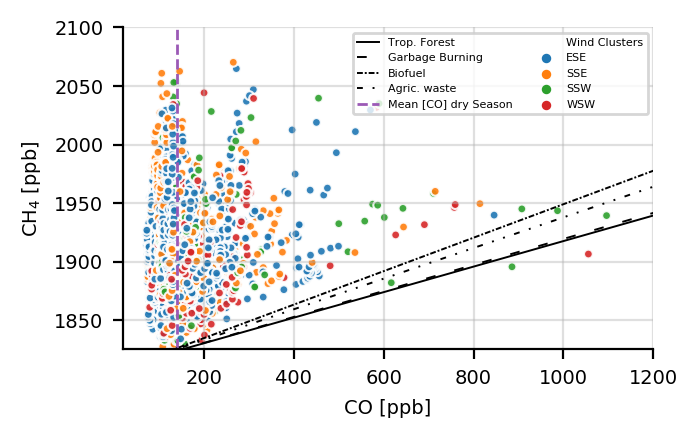

In [17]:
df_full_nobc = pd.read_pickle('./Data/df_ch4_co_ratios')
df_full_nobc = df_full_nobc.between_time('20:00','06:00')
df_selec = df_full_nobc[['wind_cluster','CH4_79','CO_79']].loc[df_full_nobc['GradFlag']==True]

c        = df_selec['wind_cluster'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
y        = df_selec['CH4_79'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
x        = df_selec['CO_79'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
print(x.shape,y.shape,c.shape)
fig,ax1  = plt.subplots(1,1,figsize=(3.5,2.2),dpi=200)

ax1.vlines(140,1700,2150,color="#9b59b6",linewidth=1,linestyle='--',label='Mean [CO] dry Season')
xx, yy   = get_points_ER(x,y,ERch4_co)
ax1.plot(xx,yy,color="k",lw=0.7,label='Trop. Forest',linestyle='-')
xx, yy = get_points_ER(x,y,ERch4_co_gb)
ax1.plot(xx,yy,color="k",lw=0.7,label='Garbage Burning',linestyle=(0, (5, 10)))
xx, yy = get_points_ER(x,y,ERch4_co_bio)
ax1.plot(xx,yy,color="k",lw=0.7,label='Biofuel',linestyle=(0, (3, 1, 1, 1)))
xx, yy = get_points_ER(x,y,ERch4_co_ar)
ax1.plot(xx,yy,color="k",lw=0.7,label='Agric. waste',linestyle=(0, (3, 5, 1, 5, 1, 5)))
sns.scatterplot(x,y,hue=c,hue_order=['ESE','SSE','SSW','WSW'],ax=ax1,alpha=0.9,s=10)
sns.despine()

ax1.set_ylim(1825,2100)
ax1.set_ylabel('CH$_4$ [ppb]')
ax1.set_xlim(20,1200)
ax1.set_xlabel('CO [ppb]')
#ax1.legend_.remove()
#ax1.legend()

sns.despine()
ax1.grid(alpha=0.4)
legend = ax1.legend(loc='upper right',frameon=True,ncol=2,fontsize=4)
legend.texts[5].set_text("Wind Clusters")

plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'legend.markerscale': 0.4})
plt.tight_layout()
plt.show()

In [18]:
points_above200ppb = x[x>200].describe()[0]
total              = y.describe()[0]
fraction_above200  = points_above200ppb/total*100
fraction_above200
# Fraction of data points larger than 200 ppb

10.527507357935251

(1490,) (1490,) (1490,)


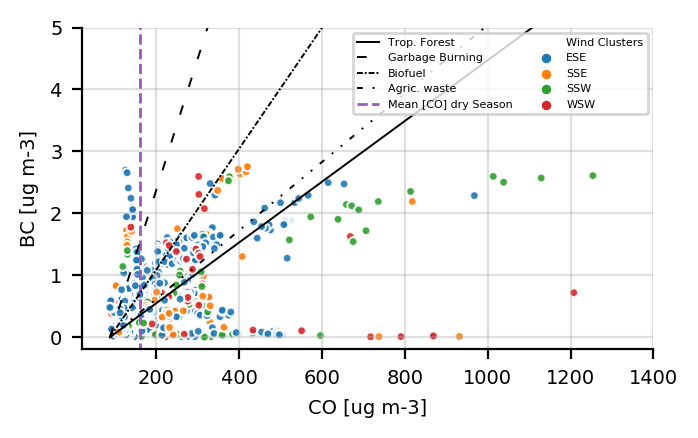

In [13]:
df_full_bc = pd.read_pickle('./Data/df_ch4_co_bc_ratios')
df_full_bc = df_full_bc.between_time('20:00','06:00')
df_selec = df_full_bc[['wind_cluster','CH4_79','CO_79','BC_ugm-3']].loc[df_full_bc['GradFlag']==True]
c        = df_selec['wind_cluster'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
y        = df_selec['CH4_79'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
x        = df_selec['CO_79'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]
ybc      = df_selec['BC_ugm-3'].loc[(df_selec['wind_cluster']=='ESE') | (df_selec['wind_cluster']=='SSE') | (df_selec['wind_cluster']=='WSW') | (df_selec['wind_cluster']=='SSW') ]

print(x.shape,y.shape,c.shape)
#fig,(ax1,ax2)  = plt.subplots(1,2,figsize=(15,6))
fig,ax1  = plt.subplots(1,1,figsize=(3.5,2.2),dpi=200)

ax1.vlines(140*to_ug_m3,-.5,10,color="#9b59b6",linewidth=1,linestyle='--',label='Mean [CO] dry Season')
xx, yy   = get_points_ER(x*to_ug_m3,ybc,ERbc_co)
ax1.plot(xx,yy,color="k",lw=0.7,label='Trop. Forest',linestyle='-')

xx, yy = get_points_ER(x*to_ug_m3,ybc,ERbc_co_gb)
ax1.plot(xx,yy,color="k",lw=0.7,label='Garbage Burning',linestyle=(0, (5, 10)))

xx, yy = get_points_ER(x*to_ug_m3,ybc,ERbc_co_bio)
ax1.plot(xx,yy,color="k",lw=0.7,label='Biofuel',linestyle=(0, (3, 1, 1, 1)))

xx, yy = get_points_ER(x*to_ug_m3,ybc,ERbc_co_ar)
ax1.plot(xx,yy,color="k",lw=0.7,label='Agric. waste',linestyle=(0, (3, 5, 1, 5, 1, 5)))
sns.scatterplot(x*to_ug_m3,ybc,hue=c,hue_order=['ESE','SSE','SSW','WSW'],ax=ax1,alpha=0.9,s=10)
sns.despine()

ax1.set_ylim(-.2,5)
ax1.set_ylabel('BC [ug m-3]')
ax1.set_xlim(20,1400)

ax1.set_xlabel('CO [ug m-3]')
#ax1.legend_.remove()
#ax1.legend()

sns.despine()
ax1.grid(alpha=0.4)
legend = ax1.legend(loc='upper right',frameon=True,ncol=2,fontsize=4)
legend.texts[5].set_text("Wind Clusters")
#legend.set_title('Emission Ratios')
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'legend.markerscale': 0.4})
plt.tight_layout()
plt.show()

### Plots for Appendix A. Mean Monthly and mean hourly wind roses
- These plots were generated in R with the openair package, see Rscript "Sbotia_et_al_Rscript.R"

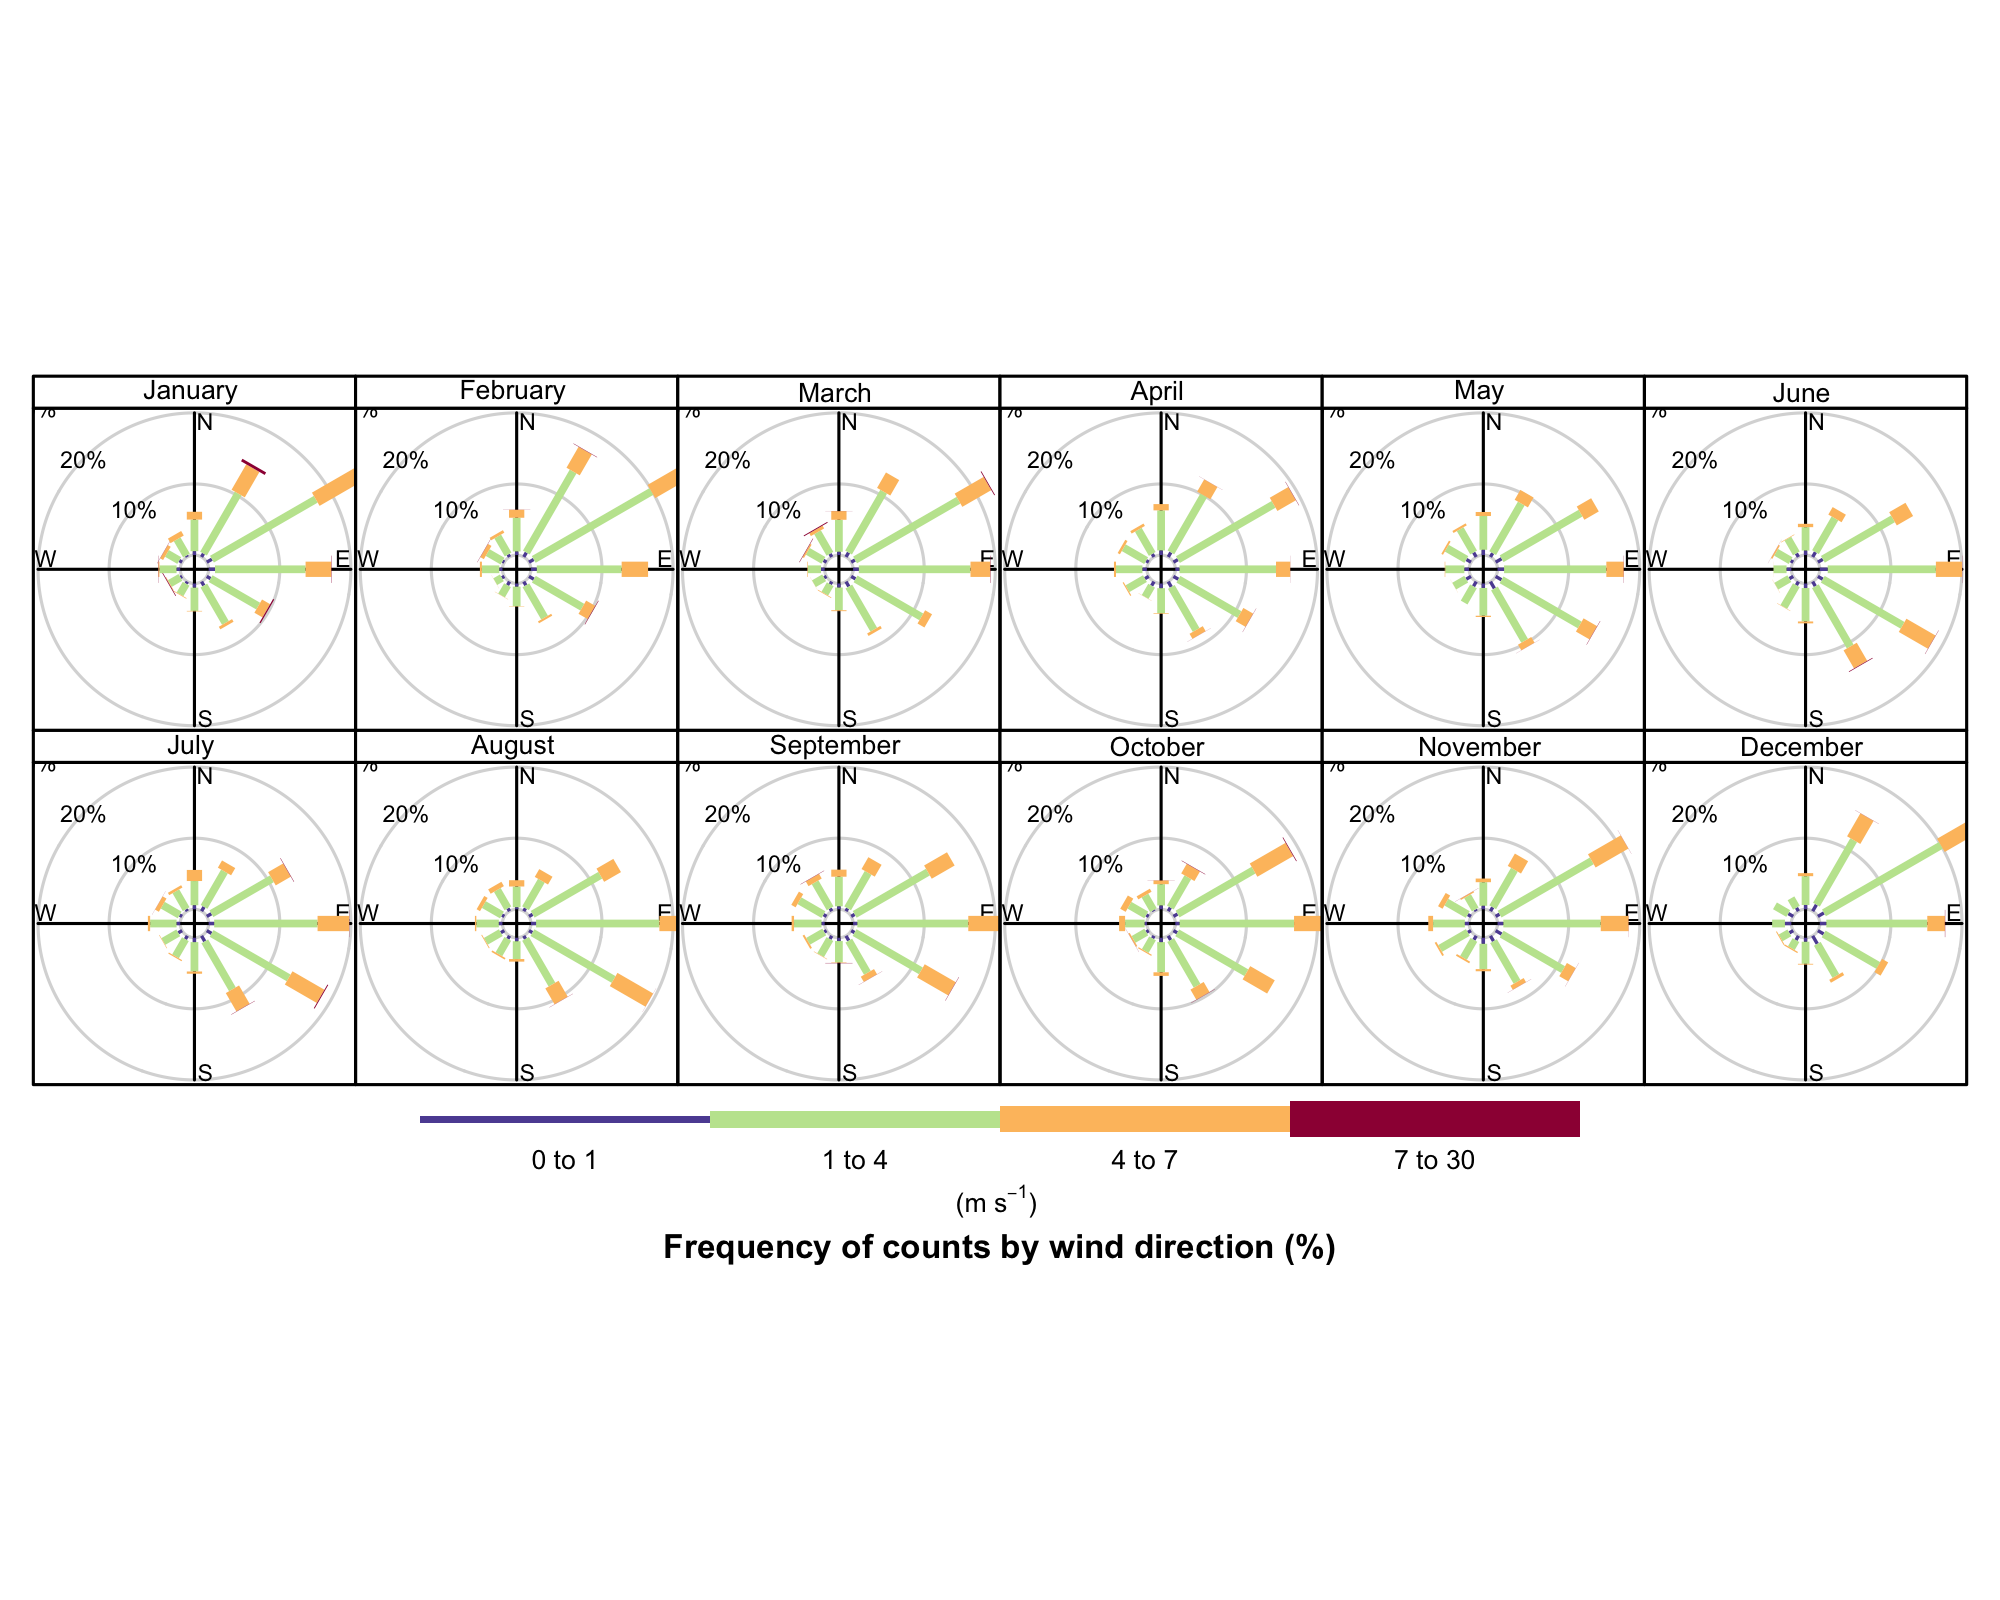

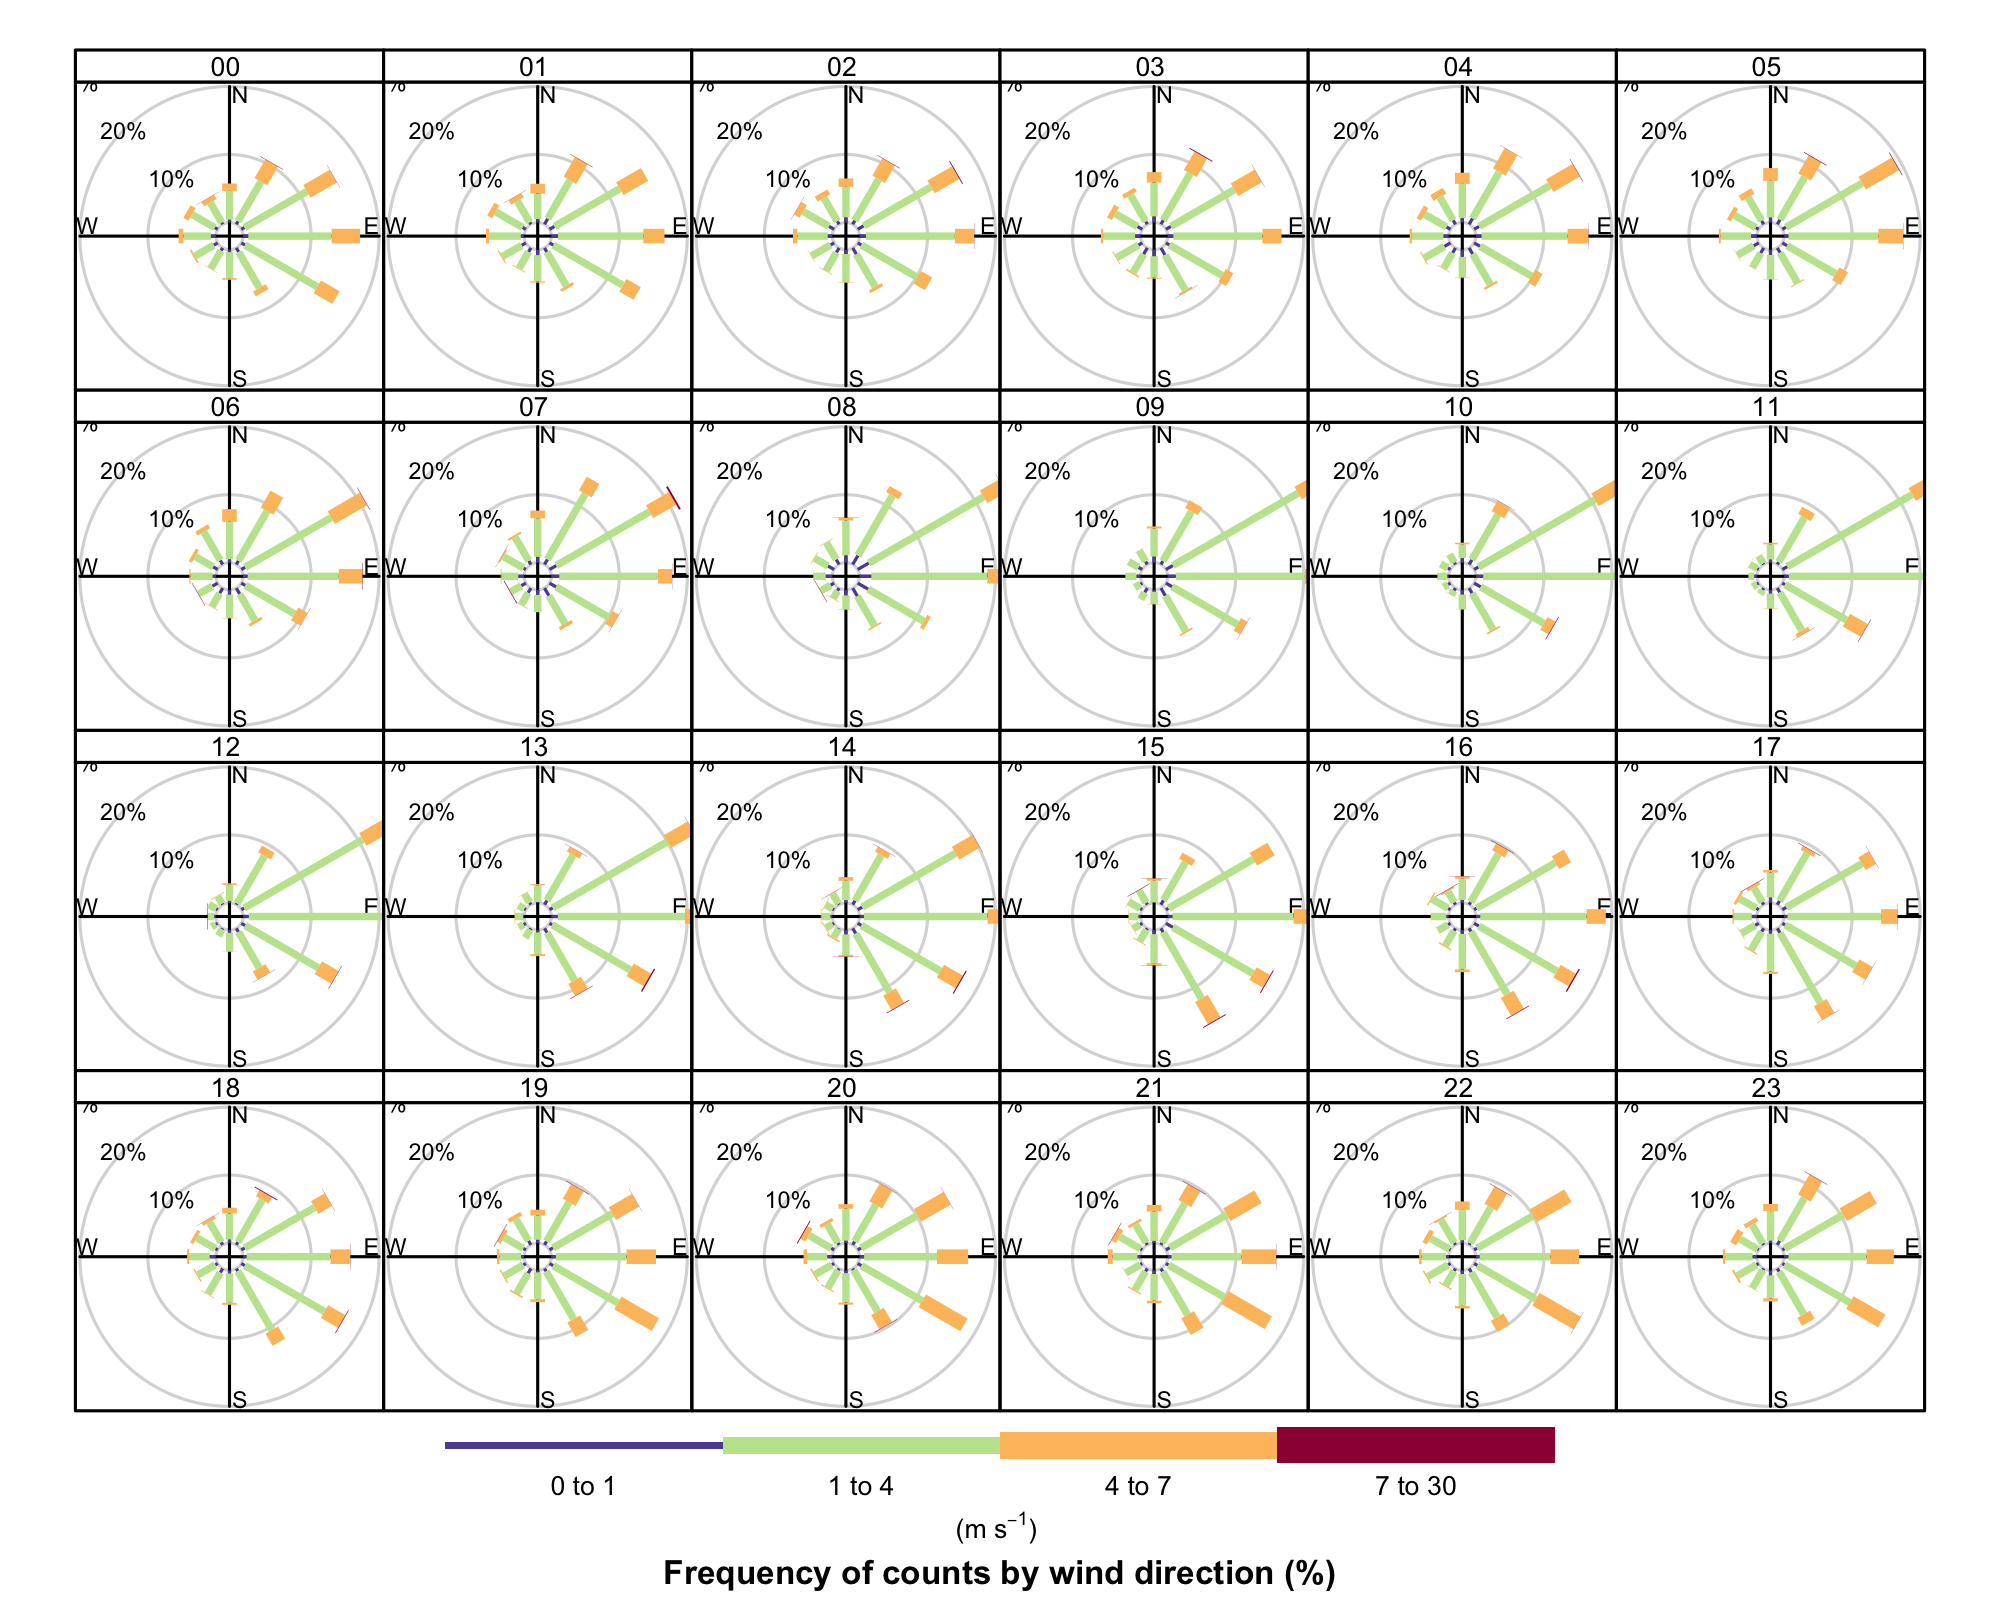

In [21]:
display(Image('./Figures/ATTO_Wrose_monthlyLT.png', width=500, unconfined=False))
display(Image('./Figures/ATTO_Wrose_diurnalLT.png', width=500, unconfined=False))

### Plot for Appendix B. Radiation in wet and dry seasons

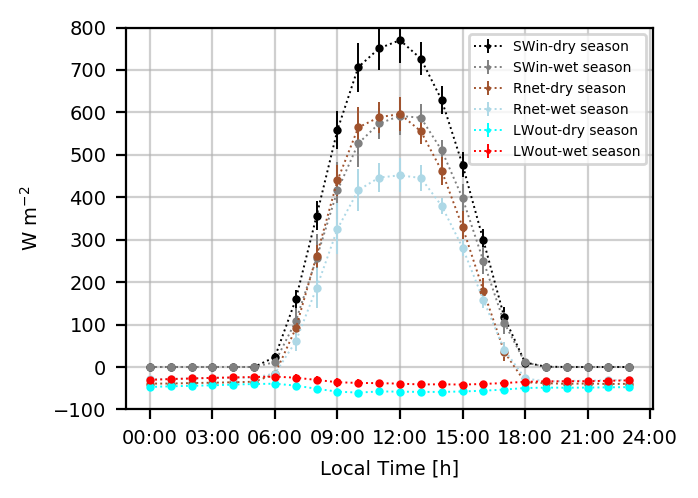

In [22]:
df        = pd.read_pickle('./Data/ATTO_GHG_Inst_flux_soil_30min')
df_month  = df.groupby([df.index.month,df.index.hour]).mean()
wet       = df_month.loc[2:6,['SW_in', 'SW_out', 'LW_atm', 'LW_terr','NetRad','FluxTsonic[Watt/m2]','Flux_Op-H2O[Watt/m2]']].groupby(level=1).mean()
dry       = df_month.loc[7:10,['SW_in', 'SW_out', 'LW_atm', 'LW_terr','NetRad','FluxTsonic[Watt/m2]','Flux_Op-H2O[Watt/m2]']].groupby(level=1).mean()
wet_std   = df_month.loc[2:6,['SW_in', 'SW_out', 'LW_atm', 'LW_terr','NetRad','FluxTsonic[Watt/m2]','Flux_Op-H2O[Watt/m2]']].groupby(level=1).std()
dry_std   = df_month.loc[7:10,['SW_in', 'SW_out', 'LW_atm', 'LW_terr','NetRad','FluxTsonic[Watt/m2]','Flux_Op-H2O[Watt/m2]']].groupby(level=1).std()

fig       = plt.figure(figsize=(3.5,2.5),dpi=200)

plt.errorbar(x = dry.index,y = dry['SW_in'],yerr=dry_std['SW_in'],color='black',marker='o',linestyle=':',label='SWin-dry season')
plt.errorbar(x = wet.index,y = wet['SW_in'],yerr=wet_std['SW_in'],color='grey',marker='o',linestyle=':',label='SWin-wet season')

plt.errorbar(x = dry.index,y = dry['NetRad'],yerr=dry_std['NetRad'],color='sienna',marker='o',linestyle=':',label='Rnet-dry season')
plt.errorbar(x = wet.index,y = wet['NetRad'],yerr=wet_std['NetRad'],color='lightblue',marker='o',linestyle=':',label='Rnet-wet season')

plt.errorbar(x = dry.index,y = dry['LW_atm'],yerr=dry_std['LW_atm'],color='cyan',marker='o',linestyle=':',label='LWout-dry season')
plt.errorbar(x = wet.index,y = wet['LW_atm'],yerr=wet_std['LW_atm'],color='red',marker='o',linestyle=':',label='LWout-wet season')

plt.xlabel('Local Time [h]')
plt.ylabel('W m$^{-2}$')

#plt.hlines(0,-5,30,color='grey',linewidth=1)
#plt.vlines(6,-100,800,color='grey',linewidth=1)
#plt.vlines(18,-100,800,color='grey',linewidth=1)
#plt.xlim(0,24)
plt.ylim(-100,800)
plt.legend(loc='upper right',fontsize=5,ncol=1)
plt.xticks(np.arange(0,27,3),('00:00','03:00', '06:00','09:00','12:00','15:00','18:00','21:00','24:00'))
plt.grid(alpha=0.6)
plt.rcParams.update({'font.size': 7})
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['lines.markersize'] = 2
plt.tight_layout()
plt.show()
#fig.savefig('./Figures/ATTO_Radiation_wet_dry.png',dpi=300)

### Plots for Appendix C. Dead Stands of Flooded forest
- This map was done by Angelica Resende
- Here I convert the tiff original image to png.

In [23]:
from PIL import Image

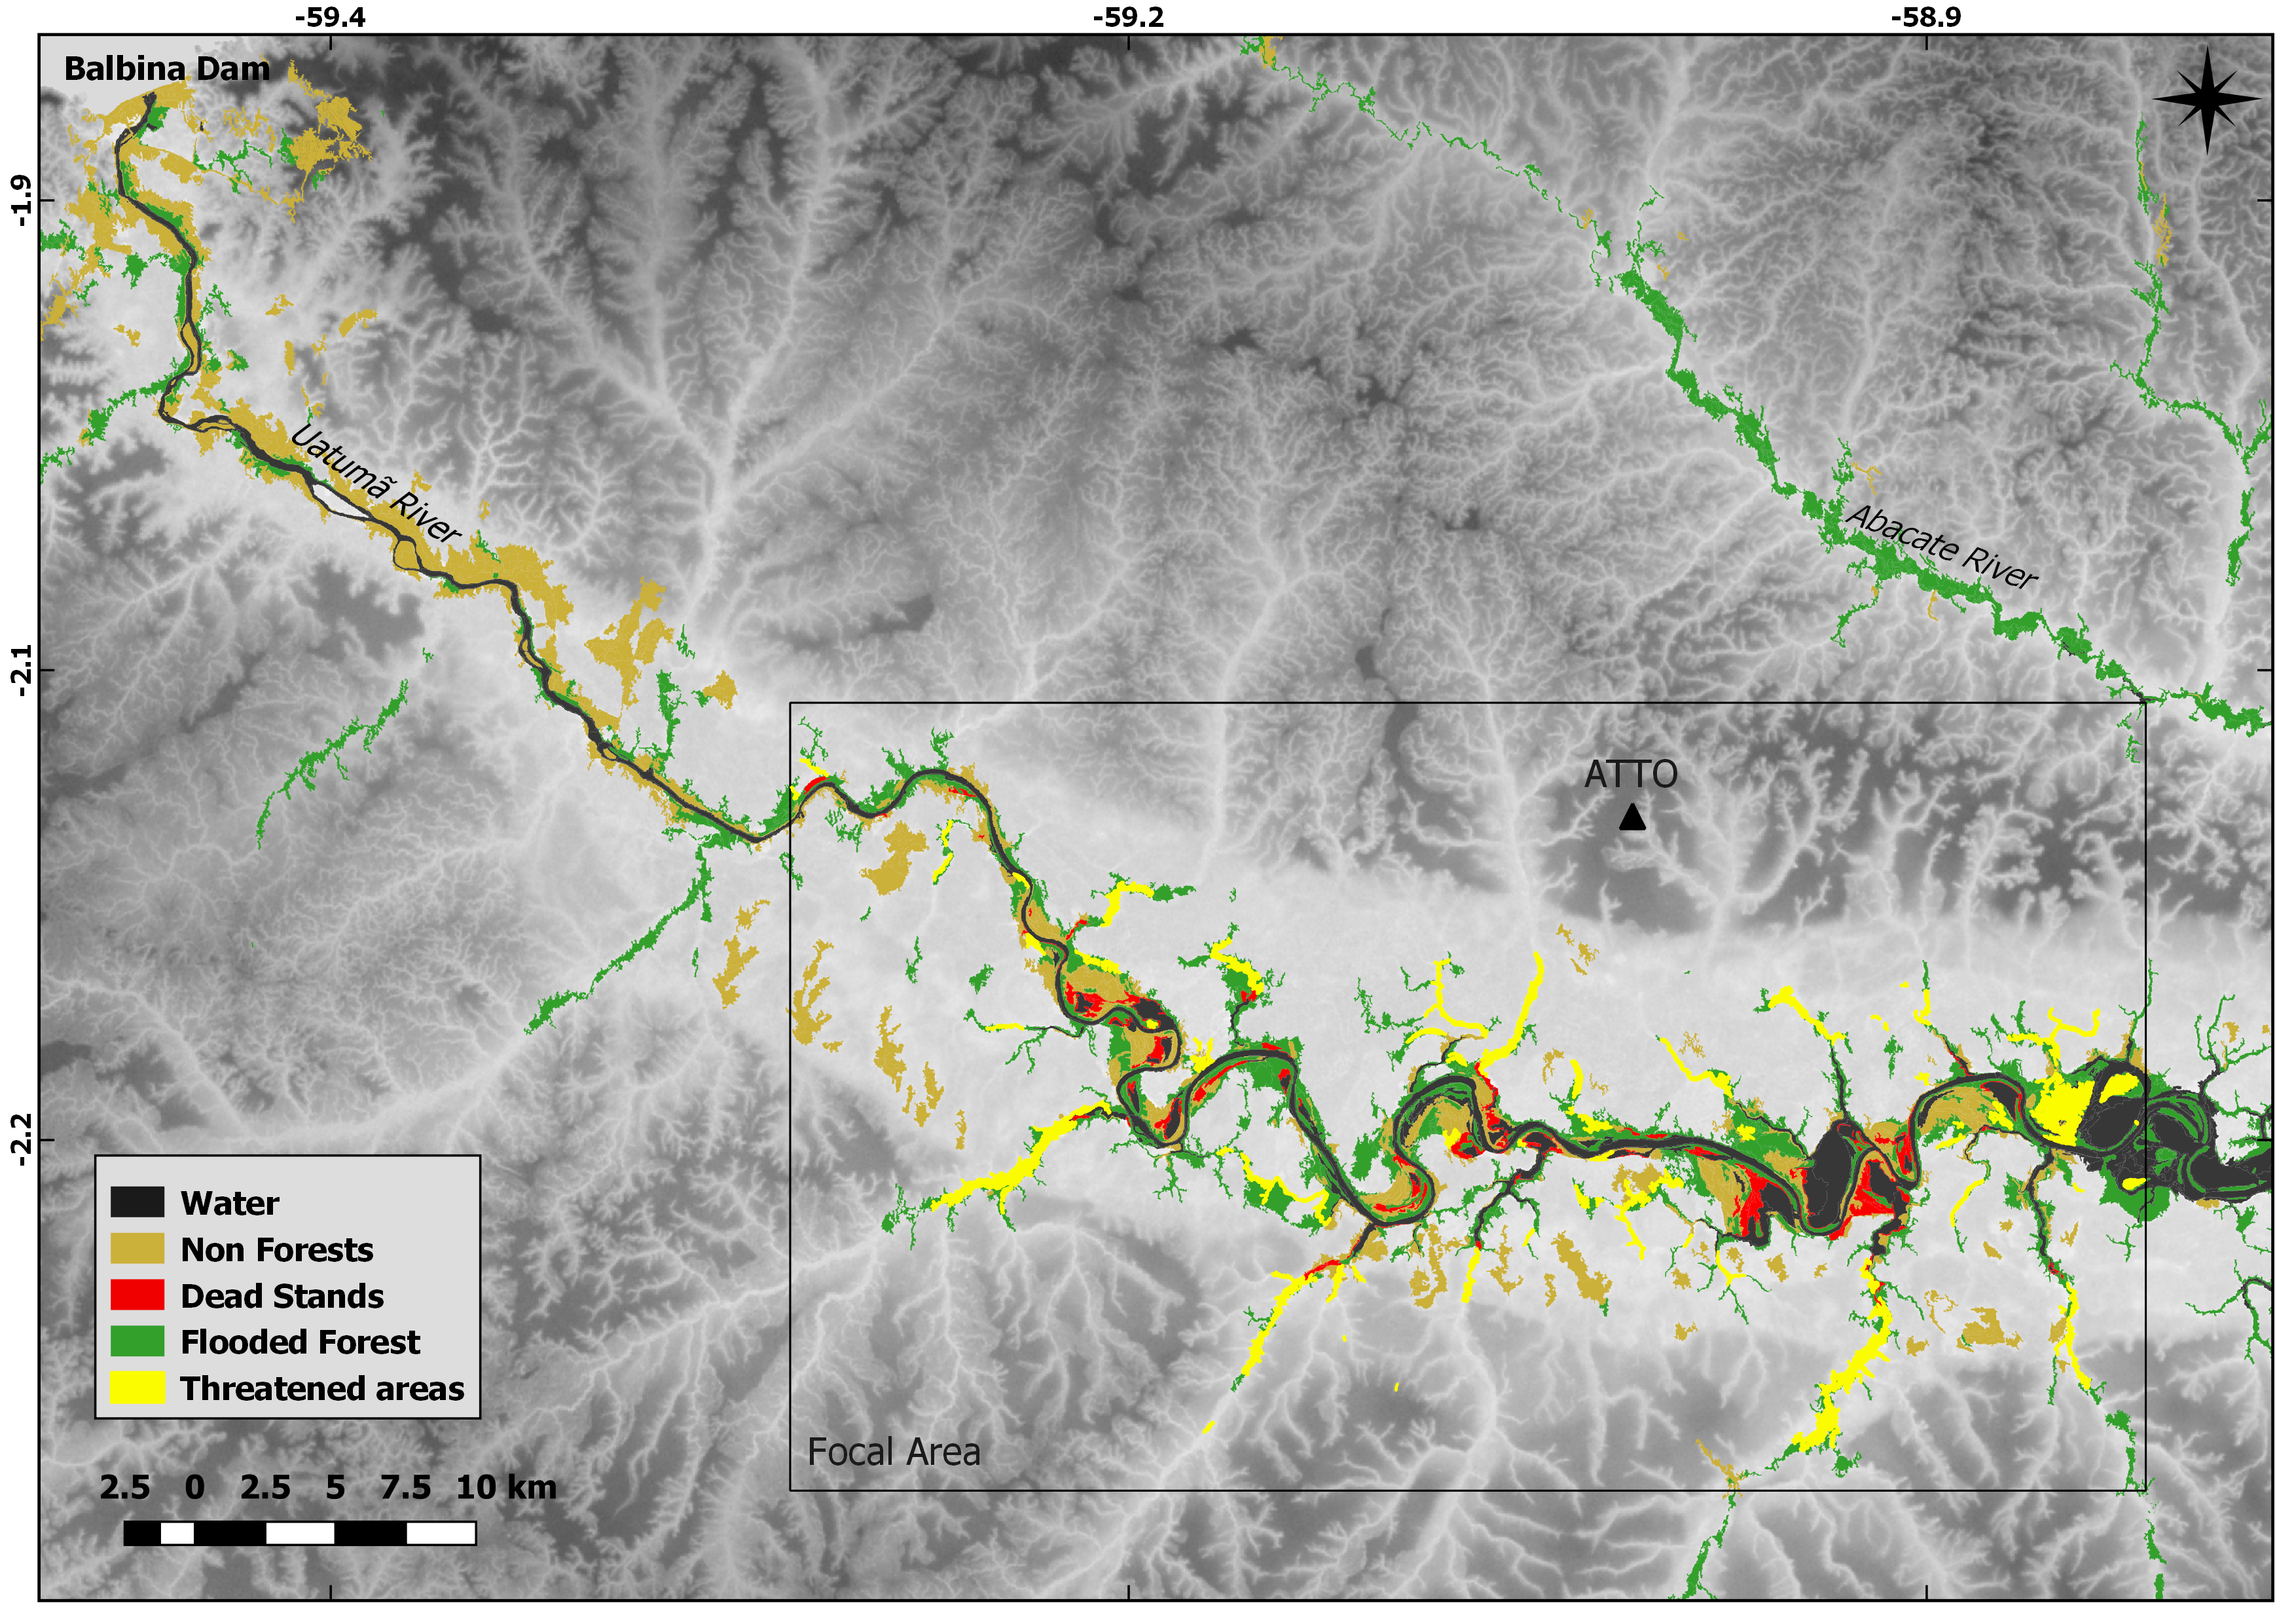

In [24]:
im  = Image.open('./Figures/Map_Angelicaa_Adapted figure_Resende et al 2019.tiff')
out = im.convert("RGB")
out.save('./Figures/Map_Angelicaa_Adapted.png', "PNG", quality=300)
im